# Lab 10: kNN

Write your name in the *markdown* cell below [2 points]

### Name: Juan Villegas

We will start by looking again at the MNIST handwritten digits dataset.

### Load the data

In [6]:
from sklearn import datasets

# load data set and extract the features (X) and target values (y)
digits = datasets.load_digits()
X = digits.data
y = digits.target

### Visualize the data

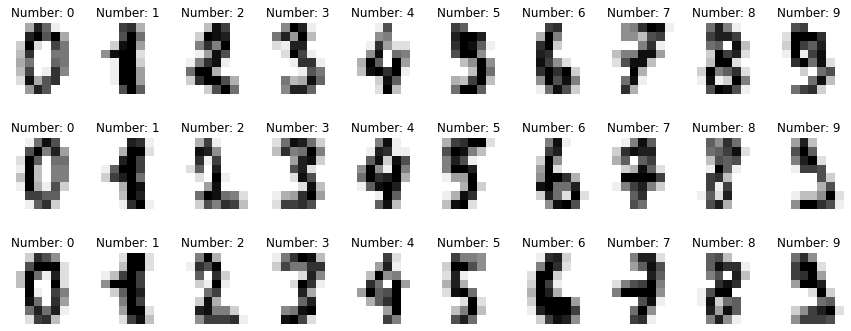

In [7]:
import matplotlib.pyplot as plt
# visualize the data by plotting the first 30 images
figure, axes = plt.subplots(3,10, figsize = (15,6))
for ax,image,number in zip(axes.ravel(), digits.images, y) :
    ax.axis('off')
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title('Number: ' + str(number))

### Question 1 <span style = 'font-size:80%'>[5 points]</span>

Display the 200th image (and only this image), along with its target value.

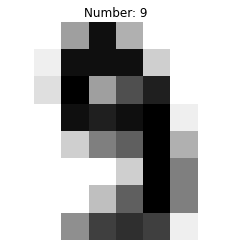

In [8]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[199], cmap = plt.cm.gray_r)
plt.axis('off')
plt.title('Number: ' + str(y[199]))
None

### Question 2 <span style = 'font-size:80%'>[5 points]</span>

How many digits in the target list are 4s? Your answer should display only the number of 4s. Hint: you can find this answer by using a Counter and displaying the number of 4s, or by creating a list of target values containing only 4s, and then displaying the length of this list.

In [13]:
only4s = []
for val in y:
    if val == 4:
        only4s.append(val)
len(only4s)

181

In [11]:
only4s = [val for val in y if val == 4 ]
len(only4s)

181

In [5]:
from collections import Counter

In [6]:
print('There are', Counter(y)[4], "4's.")

There are 181 4's.


### Split data into training and testing sets, fit the model, and make predictions in the *test* dataset

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99, stratify = y)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Look at the *confusion matrix*

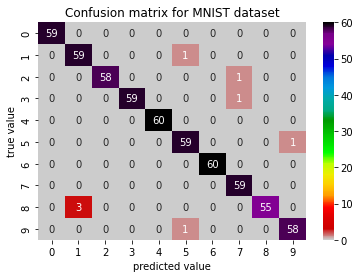

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
s = sns.heatmap(confusion, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Confusion matrix for MNIST dataset')
s.set_ylabel('true value')
s.set_xlabel('predicted value')
None

### Question 3 <span style = 'font-size:80%'>[6 points]</span>

As discussed previously, remember that
- the *recall* for a target value is the proportion of those target values that are predicted correctly
- the *precision* for a target value is the proportion of the predicted target values, for that value, that are correct
- the $f_1$ *score* for a target value is the harmonic mean of *precision* and *recall* for that target value

(a) Using Python as a calculator, calculate the *recall*, for the target value of 8, using the confusion matrix above.

In [16]:
55/58

0.9482758620689655

(b) Using Python as a calculator, calculate the *precision*, for the target value of 8, using the confusion matrix above.

In [17]:
55/55

1.0

### Calculate the *balanced accuracy*

In [18]:
from sklearn import metrics
# calculate the balanced accuracy using metrics.accuracy_score
metrics.balanced_accuracy_score(y_test, y_pred)

0.986437755698422

In [20]:
from sklearn import metrics
# calculate the balanced accuracy using metrics.accuracy_score
a = metrics.balanced_accuracy_score(y_test, y_pred)
a

0.986437755698422

### Question 4 <span style = 'font-size:80%'>[4 points]</span>

Using the training and testing sets from above, calculate the balanced accuracy when using *kNN* with *k = 7*. Which value of *k* performs better, 3 or 7?

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, y_train)
y_pred7 = knn7.predict(X_test)

In [28]:
from sklearn import metrics
# calculate the balanced accuracy using metrics.accuracy_score
b = metrics.balanced_accuracy_score(y_test, y_pred7)
b

0.9830469511007209

In [29]:
a-b

0.003390804597701025

In [27]:
print('When K = 3, The balance accuracy is', a-b, 'better than when K =7.')

When K = 3, The balance accuracy is 0.003390804597701025 better than when K =7.


### K-fold cross validation
The process of k-fold cross-validation involves splitting the dataset into _k_ groups, then using the first group for testing and the remaining *k-1* groups for training; this process is then repeated using the second group for testing and the remaining *k-1* groups for training, then the third group for testing, and so on. 

Commonly the value *k = 10* is used (Note that this is a different _k_ than the one in *knn*).

Cross-validation is useful for *hyperparameter tuning*, which is used to find the optimal (best values) for model hyperparameters such as the value of _k_ in *knn*. 

The code below demonstrates how to use the *KFold* class and *cross_val_score* function to find the best value of *k*.


In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# create an empty list to store accuracies
acc = []

# values of 'k' to iterate through
kvals = list(range(1,27,2))

# for each value of 'k', create a knn estimator and find the mean balanced accuracy using 10-fold cross validation
for k in kvals :

    # create kNN model (estimator)
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # create the k = 10 folds
    kfold = KFold(n_splits=10, random_state=99, shuffle = True)
    
    # return an array of scores that contains the balanced accuracy for each fold
    scores = cross_val_score(estimator = knn, X = digits.data, y = digits.target, cv = kfold, scoring = "balanced_accuracy" )
    print('mean balanced accuracy with k = ', k, ': ', scores.mean(), sep = '')

    # add the mean balanced accuracy for the current fold to the list
    acc.append(scores.mean())

mean balanced accuracy with k = 1: 0.9896296596152736
mean balanced accuracy with k = 3: 0.988714324691576
mean balanced accuracy with k = 5: 0.9869636497839318
mean balanced accuracy with k = 7: 0.9839053291635402
mean balanced accuracy with k = 9: 0.9835913088185603
mean balanced accuracy with k = 11: 0.9840651820236219
mean balanced accuracy with k = 13: 0.9807596264680664
mean balanced accuracy with k = 15: 0.9801346264680664
mean balanced accuracy with k = 17: 0.9777040709125107
mean balanced accuracy with k = 19: 0.9757431901753142
mean balanced accuracy with k = 21: 0.9727009422484756
mean balanced accuracy with k = 23: 0.9708170337443625
mean balanced accuracy with k = 25: 0.9669507991590877


### Question 5 <span style = 'font-size:80%'>[4 points]</span>

We want to find the value of *k* that yields the highest balanced accuracy in the test set. This can be done by visualizing the results as shown below. What value of _k_ is the best?

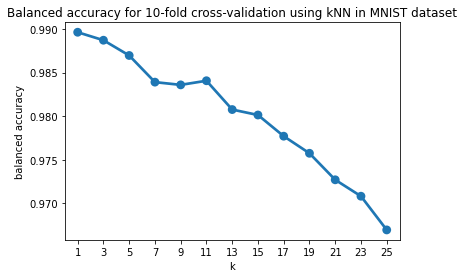

In [17]:
s = sns.pointplot(x=kvals, y=acc)
s.set_xlabel('k')
s.set_ylabel('balanced accuracy')
s.set_title('Balanced accuracy for 10-fold cross-validation using kNN in MNIST dataset')
None

In [30]:
print('1 Has the biggest k-value')

1 Has the biggest k-value


## Breast Cancer Classification 

The code below loads the *Breast cancer wisconsin dataset* that contains data for 569 images (though the data does not consist of the actual images). Each image is a breast mass that is either malignant (cancerous) or benign (normal). The features are measurements of the cell nuclei in each image, such as the radius of the nuclei (the interpretation of the features is not important, but feel free to ask questions if you are interested). This application has important medical implications -- the goal is to diagnose breast (and other) cancers more accurately and more quickly.

In [44]:
# load the data
bc = datasets.load_breast_cancer()

# extract the feature data into 'X'
X = bc.data

# extract the target data into 'y'
y = bc.target

### Question 6 <span style = 'font-size:80%'>[7 points]</span>

(a) Use python to display the number of samples in this dataset, based on *X*. You should only output the number of samples. Hint: `X.shape` returns a *tuple*.

In [45]:
print('There are',X.shape[0],'samples/records/instances/tuples in the dataset.')

There are 569 samples/records/instances/tuples in the dataset.


(b) Use python to display the number of features in this dataset, based on *X*. You should only output the number of features.

In [46]:
len(bc.feature_names)

30

In [47]:
print('There are', X.shape[1],'predictor variables/features/columns/fields/attributes in the dataset')

There are 30 predictor variables/features/columns/fields/attributes in the dataset


(c) Display the names of the features (and only these names), by accessing the appropriate value of the *bc* object.

In [48]:
print(bc.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [49]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

### Question 7 <span style = 'font-size:80%'>[5 points]</span>

Use the seaborn (*sns*) module to plot the mean radius on the x-axis and the mean smoothness on the y-axis, with the samples color coded by target value. Your plot should include appropriate x- and y-labels, as well as a title. This plot should demonstrate that these features can separate the '0' and '1' target values, which suggest that *kNN* will be effective.

In [50]:
import seaborn as sns

[Text(0.5, 0, 'mean radius'),
 Text(0, 0.5, 'mean smoothness'),
 Text(0.5, 1.0, 'Scatterplot of Mean Radius on the mean smoothness with an overlay of classification')]

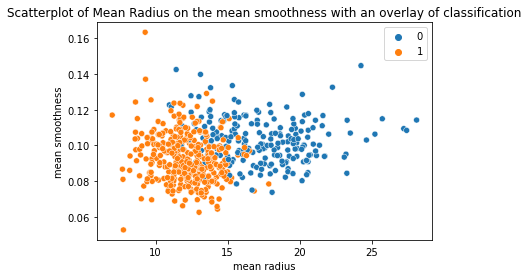

In [51]:
plot = sns.scatterplot(y = X[:,4], x = X[:,0], hue = y)
plot.set(xlabel=bc.feature_names[0], ylabel=bc.feature_names[4], title= 'Scatterplot of Mean Radius on the mean smoothness with an overlay of classification')

In [52]:
import seaborn as ans
s = sns.scatterplot
s.set(xlabel = mean)

AttributeError: 'function' object has no attribute 'set'

### Question 8 <span style = 'font-size:80%'>[10 points]</span>

The code below generates training and testing data for the Breast Cancer dataset. 

(a) Add code to make predictions in the testing dataset using *kNN* with *k = 3*. Then generate a confusion matrix and a heatmap (set the argument *fmt* to '.3g' in the *heatmap* method, to allow for 3 significant digits)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99, stratify = y)

In [54]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)

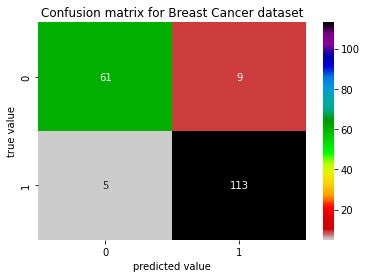

In [55]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
s = sns.heatmap(confusion, annot = True, cmap = 'nipy_spectral_r', fmt='.3g')
s.set_title('Confusion matrix for Breast Cancer dataset')
s.set_ylabel('true value')
s.set_xlabel('predicted value')
None 

(b) Calculate the balanced accuracy.

The balanced accuracy is 91.45%.


### Question 9 <span style = 'font-size:80%'>[9 points]</span>

Generate a classification report, using the target names, and answer the questions below:

In [57]:
print(metrics.classification_report(y_test, y_pred, target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       0.92      0.87      0.90        70
      benign       0.93      0.96      0.94       118

    accuracy                           0.93       188
   macro avg       0.93      0.91      0.92       188
weighted avg       0.93      0.93      0.93       188



(a) If this classifier is used, what proportion of malignant tumors would be identified (this is the *recall* for malignant images)?

In [58]:
print('The proportion of malignant tumors is .87')

The proportion of malignant tumors is .87


(b) If this classifier is used, what proportion of healthy individuals would be predicted to have cancer (this is the *false positive* rate and is equal to 1 - the *precision* for malignant images).

In [59]:
round(1-.92,3)

0.08